ImportError: No module named sc_library.hdebug

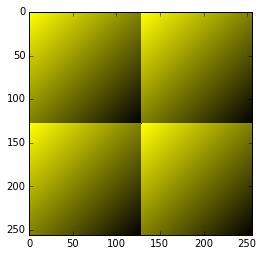

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
im_data=image2.data
im_data=np.array([im_data[:256,:256],im_data[256:,256:],im_data[:256,:256]*0])
im_data=np.swapaxes(np.swapaxes(im_data,0,2),0,1)
plt.imshow(im_data)

In [10]:
import numpy
frame_sep=numpy.array([numpy.zeros([256,257])+0.5,numpy.zeros([256,257])+1])
cols=numpy.array([[1.,0,0],[0,0,1.]])
numpy.dot(numpy.transpose(frame_sep),cols).shape
#numpy.transpose(im_data).shape,im_data.shape

(257L, 256L, 3L)

(257L, 256L, 3L)

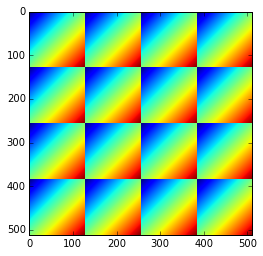

In [24]:
plt.imshow(image2.data)

In [28]:
image2.data

array([[  0,   1,   2, ..., 125, 126, 127],
       [  1,   2,   3, ..., 126, 127, 128],
       [  2,   3,   4, ..., 127, 128, 129],
       ..., 
       [125, 126, 127, ..., 250, 251, 252],
       [126, 127, 128, ..., 251, 252, 253],
       [127, 128, 129, ..., 252, 253, 254]], dtype=int16)

In [32]:
im_data[:,:,1]

array([[  0,   1,   2, ..., 125, 126, 127],
       [  1,   2,   3, ..., 126, 127, 128],
       [  2,   3,   4, ..., 127, 128, 129],
       ..., 
       [125, 126, 127, ..., 250, 251, 252],
       [126, 127, 128, ..., 251, 252, 253],
       [127, 128, 129, ..., 252, 253, 254]], dtype=int16)

In [35]:
im_data.shape[:2]

(256L, 256L)

In [3]:
import os
import sys
import re
from PyQt4 import QtCore, QtGui

# Debugging
import sc_library.hdebug as hdebug

# UIs.
import qtdesigner.steve_ui as steveUi
from qtdesigner.adjust_contrast_dialog_ui import Ui_Dialog as AdjustContrastDialog_Ui
import qtRegexFileDialog

# Graphics
import mosaicView
import positions
import sections

# Communications
import capture

# Misc
import coord
import sc_library.parameters as params

#from PyQt4 import QtCore, QtGui
import pickle
image2=pickle.load(open("test_image.pickle",'rb'))
import numpy
frame=image2.data
pixmap_min=numpy.min(frame)
pixmap_max=numpy.max(frame)

frame = numpy.ascontiguousarray(frame, dtype = numpy.float32)
frame = 255.0 * (frame - float(pixmap_min))/float(pixmap_max - pixmap_min)
frame[(frame > 255.0)] = 255.0
frame[(frame < 0.0)] = 0.0
frame = frame.astype(numpy.uint8)
w, h = frame.shape[:2]
image = QtGui.QImage(frame.data, h, w, QtGui.QImage.Format_Indexed8)
image.ndarray = frame
for i in range(256):
    image.setColor(i, QtGui.QColor(i,i,i).rgb())
    


In [1]:
from PyQt4 import QtCore, QtGui
import pickle
import numpy
image2=pickle.load(open("test_image.pickle",'rb'))

frame=image2.data.copy()
pixmap_min=numpy.min(frame)
pixmap_max=numpy.max(frame)

frame = numpy.ascontiguousarray(frame, dtype = numpy.float32)
frame = 255.0 * (frame - float(pixmap_min))/float(pixmap_max - pixmap_min)
frame[(frame > 255.0)] = 255.0
frame[(frame < 0.0)] = 0.0
frame = frame.astype(numpy.uint8)
w, h = frame.shape[:2]

image = QtGui.QImage(frame.data, h, w, QtGui.QImage.Format_RGB888)

#qimg = QtGui.QImage(cvRGBImg.data,cvRGBImg.shape[1], cvRGBImg.shape[0], QtGui.QImage.Format_RGB888)
#qpm = QtGui.QPixmap.fromImage(qimg)



In [13]:
from PyQt4 import QtCore, QtGui
import pickle
import numpy
var=pickle.load(open("test_image.pickle",'rb'))

In [20]:
var

In [21]:
var.col

array([[1, 1, 1]])

array([[1, 1, 1]])

In [ ]:
app = QtGui.QApplication([])
label = QtGui.QLabel()
label.setPixmap(pixmap)
label.show()
app.exec_()

In [3]:
import pickle
pickle.dump(image2,open("test_image.pickle",'wb'))

In [ ]:
from PyQt4 import QtCore, QtGui
pm = QtGui.QPixmap(400,200)

In [6]:
import numpy as np
im_data=np.zeros([512,512])
np.array([im_data[:256,:256],im_data[256:,256:],im_data[:256,:256]*0]).shape

(3L, 256L, 256L)

In [2]:
from PyQt4 import QtCore, QtGui
import sys
from qtdesigner.quad_view_dialog import Ui_QuadView
app = QtGui.QApplication(sys.argv)
ex = Ui_QuadView()
ex.show()
sys.exit(app.exec_())

AttributeError: 'Ui_QuadView' object has no attribute 'show'

In [1]:
from PyQt4 import QtCore, QtGui
import sys
from qtdesigner.quad_view_dialog import Ui_QuadView

class QuadViewDialog(QtGui.QDialog, Ui_QuadView):
    ## __init__
    #
    # @param title_text The text of the title of the dialog box
    # @param default_min_max The starting minimum and maximum values
    # @param scale_min_max The minimum and maximum allowed values
    # @param parent (Optional) The PyQt parent of this object, default is None.
    #
    def __init__(self, parent = None,
                 title_text = "Adjust Contrast",
                 default_nr_views = 2,
                 default_size_x = 256,
                 default_size_y = 256
                 ):
        QtGui.QDialog.__init__(self,parent)
        self.setupUi(self)

        # Update window title.
        self.setWindowTitle(title_text)
"""
        # Configure the spin boxes.
        self.high_spin_box.setRange(scale_min_max[0], scale_min_max[1])
        self.high_spin_box.setValue(default_min_max[1])
        self.high_spin_box.setSingleStep(1)
        self.low_spin_box.setRange(scale_min_max[0], scale_min_max[1])
        self.low_spin_box.setValue(default_min_max[0])
        self.low_spin_box.setSingleStep(1)

        # Configure the slider.
        self.high_contrast_slider.setRange(scale_min_max[0], scale_min_max[1])
        self.high_contrast_slider.setSliderPosition(default_min_max[1])
        self.low_contrast_slider.setRange(scale_min_max[0], scale_min_max[1])
        self.low_contrast_slider.setSliderPosition(default_min_max[0])

        # Connect signals.
        self.high_contrast_slider.sliderMoved.connect(self.handleHighSliderUpdate)
        self.low_contrast_slider.sliderMoved.connect(self.handleLowSliderUpdate)
        self.high_contrast_slider.sliderReleased.connect(self.handleHighSliderRelease)
        self.low_contrast_slider.sliderReleased.connect(self.handleLowSliderRelease)

        self.high_spin_box.valueChanged.connect(self.handleHighSpinBoxUpdate)
        self.low_spin_box.valueChanged.connect(self.handleLowSpinBoxUpdate)


   ## getValues
    #
    # Return the values of the directory and file filter text boxes
    #
    # @return The minimum and maximum contrast values set by the user
    @hdebug.debug
    def getValues(self):
        return [self.low_spin_box.value(), self.high_spin_box.value()]
"""

'\n        # Configure the spin boxes.\n        self.high_spin_box.setRange(scale_min_max[0], scale_min_max[1])\n        self.high_spin_box.setValue(default_min_max[1])\n        self.high_spin_box.setSingleStep(1)\n        self.low_spin_box.setRange(scale_min_max[0], scale_min_max[1])\n        self.low_spin_box.setValue(default_min_max[0])\n        self.low_spin_box.setSingleStep(1)\n\n        # Configure the slider.\n        self.high_contrast_slider.setRange(scale_min_max[0], scale_min_max[1])\n        self.high_contrast_slider.setSliderPosition(default_min_max[1])\n        self.low_contrast_slider.setRange(scale_min_max[0], scale_min_max[1])\n        self.low_contrast_slider.setSliderPosition(default_min_max[0])\n\n        # Connect signals.\n        self.high_contrast_slider.sliderMoved.connect(self.handleHighSliderUpdate)\n        self.low_contrast_slider.sliderMoved.connect(self.handleLowSliderUpdate)\n        self.high_contrast_slider.sliderReleased.connect(self.handleHighSlider

In [ ]:
import sys
app = QtGui.QApplication(sys.argv)
# Load app.
wind = QuadViewDialog()
wind.show()
app.exec_()

In [ ]:
    def __init__(self, parent = None,
                 title_text = "Adjust Contrast",
                 default_nr_views = 2,
                 default_size_x = 256,
                 default_size_y = 256
                 ):
        QtGui.QDialog.__init__(self,parent)
        self.setupUi(self)
        # Update window title.
        self.setWindowTitle(title_text)
        self.View1=DragButton("smth",self.View1)

In [1]:
from PyQt4 import QtCore, QtGui


class DragView(QtGui.QFrame):
    def __init__(self,parent,labelName,coordinates):
        QtGui.QFrame.__init__(self,parent)
        # construct frame for view
        self.setGeometry(QtCore.QRect(coordinates[0], coordinates[1], coordinates[2], coordinates[3]))
        self.setAutoFillBackground(False)
        self.setFrameShape(QtGui.QFrame.StyledPanel)
        self.setFrameShadow(QtGui.QFrame.Plain)
        # construct label for view
        self.ViewLabel = QtGui.QLabel(self)
        self.ViewLabel.setGeometry(QtCore.QRect(10, 10, 40, 40))
        self.ViewLabel.setText(labelName)
    ##
    def mousePressEvent(self, event):
        self.__mousePressPos = None
        self.__mouseMovePos = None
        if event.button() == QtCore.Qt.LeftButton:
            self.__mousePressPos = event.globalPos()
            self.__mouseMovePos = event.globalPos()

        super(DragView, self).mousePressEvent(event)

    def mouseMoveEvent(self, event):
        if event.buttons() == QtCore.Qt.LeftButton:
            # adjust offset from clicked point to origin of widget
            currPos = self.mapToGlobal(self.pos())
            globalPos = event.globalPos()
            diff = globalPos - self.__mouseMovePos
            newPos = self.mapFromGlobal(currPos + diff)
            self.move(newPos)

            self.__mouseMovePos = globalPos

        super(DragView, self).mouseMoveEvent(event)

    def mouseReleaseEvent(self, event):
        print "pisici"
        super(DragView, self).mouseReleaseEvent(event)
        
    def getCoordinates():
        return self.geometry().getCoords()

if __name__ == "__main__":
    import numpy
    app = QtGui.QApplication([])
    wg = QtGui.QWidget()
    wg.resize(800,600)
    frame_ = numpy.random.random(256*256*3).reshape([256,256,3])
    pixmap_min,pixmap_max=0.,1.
    #cols=numpy.array([[1,1,1]])
    #frame = numpy.dot(numpy.transpose(frame_),cols)
    # Rescale & convert to 8bit
    frame = numpy.ascontiguousarray(frame_, dtype = numpy.float32)
    frame = 255.0 * (frame - float(pixmap_min))/float(pixmap_max - pixmap_min)
    frame[(frame > 255.0)] = 255.0
    frame[(frame < 0.0)] = 0.0
    frame = frame.astype(numpy.uint8)

    # Create the pixmap
    w, h = frame.shape[:2]
    image_ = QtGui.QImage(frame.data, h, w, QtGui.QImage.Format_RGB888)
    image_.ndarray = frame
    pixmapOriginal = QtGui.QPixmap.fromImage(image_) 
    #painterOriginal = QtGui.QPainter()
    #painterOriginal.begin(wg)
    #painterOriginal.drawPixmap(0,0,pixmapOriginal)
    #painterOriginal.end()
    label = QtGui.QLabel(wg)
    label.setPixmap(pixmapOriginal)
    start_x,start_y = 100,100
    QVsize_x,QVsize_y = 256,256
    View1 = DragView(wg,"View 1", [start_x,start_y,QVsize_x,QVsize_y])
    View2 = DragView(wg,"View 2", [start_x+QVsize_x,start_y,QVsize_x,QVsize_y])
    wg.show()
    app.exec_()

pisici
pisici
pisici


In [5]:
pixmapOriginal.width()

256

(256L, 256L, 3L)

In [16]:
val=1000
val[val>256]=256

TypeError: 'int' object does not support item assignment

SyntaxError: invalid syntax (<ipython-input-20-9857aabb1921>, line 1)

In [1]:
#!/usr/bin/python
#
## @file
#
# A utility for creating image mosaics and imaging array tomography type samples.
#
# Hazen 07/13
#

import os
import sys
import re
import numpy
import pickle
from PyQt4 import QtCore, QtGui

sys.path.append("C:\\Users\\Bogdan\\Desktop\\storm-control-master\\")
# Debugging
import sc_library.hdebug as hdebug

# UIs.
import qtdesigner.steve_ui as steveUi
from qtdesigner.adjust_contrast_QV_dialog_ui import Ui_Dialog as AdjustContrastDialog_Ui
from qtdesigner.quad_view_dialog_ui import Ui_Dialog as Ui_QuadView
import qtRegexFileDialog

# Graphics
import mosaicView
import positions
import sections

# Communications
import capture

# Misc
import coord
import sc_library.parameters as params


class DragView(QtGui.QFrame):
    ## __init__
    #
    # Connect and configure sliders.
    # 
    @hdebug.debug
    def __init__(self,parent,labelName,coordinates,additionalparent):
        QtGui.QFrame.__init__(self,parent)
        # construct frame for view
        self.setGeometry(QtCore.QRect(coordinates[0], coordinates[1], coordinates[2], coordinates[3]))
        self.setAutoFillBackground(False)
        self.setFrameShape(QtGui.QFrame.StyledPanel)
        self.setFrameShadow(QtGui.QFrame.Plain)
        # construct label for view
        self.ViewLabel = QtGui.QLabel(self)
        self.ViewLabel.setGeometry(QtCore.QRect(10, 10, 40, 40))
        self.ViewLabel.setText(labelName)
        self.additionalparent=additionalparent
        
    ## mousePressEvent
    #
    # Super the press button function to find the mouse position
    # 
    @hdebug.debug
    def mousePressEvent(self, event):
        self.__mousePressPos = None
        self.__mouseMovePos = None
        if event.button() == QtCore.Qt.LeftButton:
            self.__mousePressPos = event.globalPos()
            self.__mouseMovePos = event.globalPos()

        super(DragView, self).mousePressEvent(event)
        
    ## mouseMoveEvent
    #
    # Super the click-and-move function to move the object
    #
    @hdebug.debug
    def mouseMoveEvent(self, event):
        if event.buttons() == QtCore.Qt.LeftButton:
            # adjust offset from clicked point to origin of widget
            currPos = self.mapToGlobal(self.pos())
            globalPos = event.globalPos()
            diff = globalPos - self.__mouseMovePos
            newPos = self.mapFromGlobal(currPos + diff)
            self.move(newPos)

            self.__mouseMovePos = globalPos

        super(DragView, self).mouseMoveEvent(event)
        
    ## mouseReleaseEvent
    #
    # Super the release function to update the composite image
    #
    @hdebug.debug
    def mouseReleaseEvent(self, event):
        self.additionalparent.updateQVImage()
        super(DragView, self).mouseReleaseEvent(event)
    
    ## mouseMoveEvent
    #
    # Super the click-and-move function to move the object
    #
    @hdebug.debug   
    def getCoordinates(self):
        return self.geometry().getCoords()[:2]

class QuadViewDialog(QtGui.QDialog, Ui_QuadView):
    ## __init__
    #
    # @param title_text The text of the title of the dialog box
    # @param nr_views_ The number of views
    # @param QVsize_x_ The size along the x axis of the combined view
    # @param QVsize_y_ The size along the y axis of the combined view
    # @param views_coords_ The coordinates of the left-up corner of the views
    # @param cols_ The colors of the the views in the combined image
    # @param parent The PyQt parent of this object, default is None.
    #
    def __init__(self, parent = None,
                 title_text = "QuadView",
                 nr_views_ = 2,
                 QVsize_x_ = 256,
                 QVsize_y_ = 256,
                 views_coords_=[[0,0],[0,256],[256,0],[256,256]],
                 cols_=[[1.,0.,0.],[0.,0.,1.],[0.,1.,0.],[1.,1.,0.]],
                 scale_min_max = [0,16000],
                 default_min_max = [[0,0,0,0],[16000,16000,16000,16000]]
                 ):
        QtGui.QDialog.__init__(self,parent)
        self.setupUi(self)
        # Update window title.
        self.setWindowTitle(title_text)
        # variables:
        self.scale_min_max = scale_min_max
        self.default_min_max = default_min_max
        self.views_coords = numpy.array(views_coords_)
        self.QVsize_x = QVsize_x_
        self.QVsize_y = QVsize_y_
        self.cols = numpy.array(cols_)
        self.nr_views = nr_views_
        self.current_center_x_um = 0.
        self.current_center_y_um = 0.
        self.parent = parent
        self.frame = None
        self.frames = []
        # Disconnect comms of the parent
        self.parent.toggleTakingPicturesStatus(False)
        self.parent.comm.commDisconnect()
        # Initialize QV communication
        self.comm = capture.Capture(parent.parameters)
        # Set QV configurations
        self.numViews.setValue(nr_views_)
        self.QVSizeX.setValue(QVsize_x_)
        self.QVSizeY.setValue(QVsize_y_)
        # Set QV signals
        self.QVSizeX.valueChanged.connect(self.handleSizeChange)
        self.QVSizeY.valueChanged.connect(self.handleSizeChange)
        self.numViews.valueChanged.connect(self.handleSizeChange)
        self.buttonBox.accepted.connect(self.dump_save)
        self.colObj_1.clicked.connect(self.handleCol1Change)
        self.colObj_2.clicked.connect(self.handleCol2Change)
        self.colObj_3.clicked.connect(self.handleCol3Change)
        self.colObj_4.clicked.connect(self.handleCol4Change)
        self.save_parms_btn.clicked.connect(self.handleSaveQV)
        self.load_parms_btn.clicked.connect(self.handleLoadQV)
        # Set QV comms
        self.comm.getPositionComplete.connect(self.handleGetPositionComplete)
        self.comm.captureComplete.connect(self.addImageOriginal)
        # comms for sliders and their spin boxes
        self.high_contrast_sliders = [self.high_contrast_slider_1,self.high_contrast_slider_2,self.high_contrast_slider_3,self.high_contrast_slider_4]
        self.low_contrast_sliders = [self.low_contrast_slider_1,self.low_contrast_slider_2,self.low_contrast_slider_3,self.low_contrast_slider_4]
        self.high_spin_boxes = [self.high_spin_box_1,self.high_spin_box_2,self.high_spin_box_3,self.high_spin_box_4]
        self.low_spin_boxes = [self.low_spin_box_1,self.low_spin_box_2,self.low_spin_box_3,self.low_spin_box_4]
        
        # Take a picture at the current position and work with that
        self.comm.commConnect()
        self.comm.getPosition()
        if self.comm.setDirectory(parent.parameters.directory):
            self.comm.captureStart(self.current_center_x_um, self.current_center_y_um)
        else:
            self.comm.commDisconnect()
            
    ## connect_configure_sliders
    #
    # Connect and configure sliders.
    # 
    @hdebug.debug    
    def connect_configure_sliders(self):
        counter = 0
        for slider in self.high_contrast_sliders:
            #connect
            slider.sliderMoved.connect(self.handleHighSliderUpdate)
            slider.sliderReleased.connect(self.handleHighSliderRelease)
            #configure
            slider.setRange(self.scale_min_max[0], self.scale_min_max[1])
            slider.setSliderPosition(self.default_min_max[1][counter])
            counter+=1
        counter = 0
        for slider in self.low_contrast_sliders:
            #connect
            slider.sliderMoved.connect(self.handleLowSliderUpdate)
            slider.sliderReleased.connect(self.handleLowSliderRelease)
            #configure
            slider.setRange(self.scale_min_max[0], self.scale_min_max[1])
            slider.setSliderPosition(self.default_min_max[0][counter])
            counter+=1
            
    ## connect_configure_spin_boxes
    #
    # Connect and configure spinboxes associated with the sliders
    # 
    @hdebug.debug
    def connect_configure_spin_boxes(self):
        counter = 0
        for box in self.high_spin_boxes:
            #connect
            box.valueChanged.connect(self.handleHighSpinBoxUpdate)
            #configure
            box.setRange(self.scale_min_max[0], self.scale_min_max[1])
            box.setValue(self.default_min_max[1][counter])
            box.setSingleStep(1)
            counter+=1
        counter = 0
        for box in self.low_spin_boxes:
            #connect
            box.valueChanged.connect(self.handleLowSpinBoxUpdate)
            #configure
            box.setRange(self.scale_min_max[0], self.scale_min_max[1])
            box.setValue(self.default_min_max[0][counter])
            box.setSingleStep(1)
            counter+=1

    ## getValues
    #
    # Return the values of the directory and file filter text boxes
    #
    # @return The minimum and maximum contrast values set by the user for all quad-views
    @hdebug.debug
    def getValues(self):
        return [[box.value() for box in self.low_spin_boxes],[box.value() for box in self.high_spin_boxes]]


    ## handleHighSliderRelease
    #
    # Coerce sliders value to new range upon release
    #
    @hdebug.debug
    def handleHighSliderRelease(self):
        for i in range(len(self.high_contrast_sliders)):
            high_contrast_slider = self.high_contrast_sliders[i]
            low_spin_box = self.low_spin_boxes[i]
            high_spin_box = self.high_spin_boxes[i]
            
            new_value = high_contrast_slider.value()
            low_value = low_spin_box.value()
            if new_value > low_value: # Coerce to larger than low contrast
                high_spin_box.setValue(new_value)
            else:
                high_contrast_slider.setValue(low_value+1)
                high_spin_box.setMinimum(low_value+1)

    ## handleLowSliderRelease
    #
    # Coerce sliders value to new range upon release
    #
    @hdebug.debug
    def handleLowSliderRelease(self):
        for i in range(len(self.low_contrast_sliders)):
            low_contrast_slider = self.low_contrast_sliders[i]
            low_spin_box = self.low_spin_boxes[i]
            high_spin_box = self.high_spin_boxes[i]
            
            new_value = low_contrast_slider.value()
            high_value = high_spin_box.value()
            if new_value < high_value: # Coerce to smaller than high contrast
                low_spin_box.setValue(new_value)
            else:
                low_contrast_slider.setValue(high_value-1)
                low_spin_box.setMaximum(high_value-1)
    
    ## handleHighSliderUpdate
    #
    # Handle movement of the high contrast slider
    #
    @hdebug.debug
    def handleHighSliderUpdate(self, dummy):
        for i in range(len(self.high_contrast_sliders)):
            self.high_spin_boxes[i].setValue(self.high_contrast_sliders[i].value())

    ## handleLowSliderUpdate
    #
    # Handle movement of the low contrast sliders
    #
    @hdebug.debug
    def handleLowSliderUpdate(self, dummy):
        for i in range(len(self.low_contrast_sliders)):
            self.low_spin_boxes[i].setValue(self.low_contrast_sliders[i].value())

    ## handleHighSpinBoxUpdate
    #
    # Handle user adjustment of the high contrast spin box
    #
    @hdebug.debug
    def handleHighSpinBoxUpdate(self, dummy):
        for i in range(len(self.high_contrast_sliders)):
            self.high_contrast_sliders[i].setValue(self.high_spin_boxes[i].value())
        if self.connectQV_On:
            self.pixmap_mins,self.pixmap_maxs=self.getValues()
            self.updateQVImage()
            
    ## handleLowSpinBoxUpdate
    #
    # Handle user adjustment of the low contrast spin box
    #
    @hdebug.debug
    def handleLowSpinBoxUpdate(self, dummy):
        for i in range(len(self.low_contrast_sliders)):
            self.low_contrast_sliders[i].setValue(self.low_spin_boxes[i].value())
        if self.connectQV_On:
            self.pixmap_mins,self.pixmap_maxs=self.getValues()
            self.updateQVImage()
            
    ## handleSizeChange
    #
    # Handles a change in the size or number of the quadviews
    #
    # @param num Dummy parameter.
    #
    @hdebug.debug
    def handleSizeChange(self, num):
        if self.connectQV_On:
            self.QVsize_x = self.QVSizeX.value()
            self.QVsize_y = self.QVSizeY.value()
            self.nr_views = self.numViews.value()
            self.updateViews()
            self.updateQVImage()
            
    ## handleSaveQV
    #
    # Saves paramaters of the QV.
    #
    @hdebug.debug
    def handleSaveQV(self,Dummy):
        QV_filename = str(QtGui.QFileDialog.getSaveFileName(self,
                                                                "Save QV", 
                                                                self.parent.parameters.directory,
                                                                "*.qvset"))
        if QV_filename:
            save_dic = {}
            [save_dic["activeCols"],save_dic["cols"],save_dic["nr_views"],
             save_dic["QVsize_x"],save_dic["QVsize_y"],save_dic["finalTrims"],
             save_dic["pixmap_mins"],save_dic["pixmap_maxs"],save_dic["views_coords"]]=[self.activeCols,self.cols,self.nr_views,
             self.QVsize_x,self.QVsize_y,self.finalTrims,
             self.pixmap_mins,self.pixmap_maxs,self.views_coords]
            pickle.dump(save_dic,open(QV_filename,'wb'))
            
    ## handleLoadQV
    #
    # Loads paramaters of the QV.
    #
    @hdebug.debug
    def handleLoadQV(self,Dummy):
        QV_filename = str(QtGui.QFileDialog.getOpenFileName(self,
                                                                "Load QV", 
                                                                self.parent.parameters.directory,
                                                                "*.qvset"))
        if QV_filename:
            # load dictionary
            save_dic=pickle.load(open(QV_filename,'rb'))
            [self.activeCols,self.cols,self.nr_views,
             self.QVsize_x,self.QVsize_y,self.finalTrims,
             self.pixmap_mins,self.pixmap_maxs,self.views_coords]=[save_dic["activeCols"],save_dic["cols"],save_dic["nr_views"],
             save_dic["QVsize_x"],save_dic["QVsize_y"],save_dic["finalTrims"],
             save_dic["pixmap_mins"],save_dic["pixmap_maxs"],save_dic["views_coords"]]
            # update everything in QV 
            self.connectQV_On = False #This ensures changes in values of spin boxes/sliders don't overwrite with the loaded data
            self.numViews.setValue(self.nr_views)
            self.QVSizeX.setValue(self.QVsize_x)
            self.QVSizeY.setValue(self.QVsize_y)
            for i in range(4):
                self.high_contrast_sliders[i].setSliderPosition(self.pixmap_maxs[i])
                self.low_contrast_sliders[i].setSliderPosition(self.pixmap_mins[i])
                self.high_spin_boxes[i].setValue(self.pixmap_maxs[i])
                self.low_spin_boxes[i].setValue(self.pixmap_mins[i])
            self.addColorsToButtons()
            self.updateViews()
            self.updateQVImage()
            self.connectQV_On = True
            
    ## handleGetPositionComplete
    #
    # Updates the QV dialog of the stage position
    #
    @hdebug.debug 
    def handleGetPositionComplete(self, a_point):
        self.current_center_x_um, self.current_center_y_um = a_point.x_um, a_point.y_um
        
    # handleCol1_2_3_4Change
    #
    # wrappers for the color change
    #
    # @param num Dummy parameter.
    #
    @hdebug.debug
    def handleCol1Change(self,num):
        self.handleColChange(0)
    @hdebug.debug
    def handleCol2Change(self,num):
        self.handleColChange(1)
    @hdebug.debug
    def handleCol3Change(self,num):
        self.handleColChange(2)
    @hdebug.debug
    def handleCol4Change(self,num):
        self.handleColChange(3)
    @hdebug.debug
    
    ## handleColChange
    #
    # Handles a change in the color of the quadviews
    #
    # @param num indicates the quadview number.
    #
    @hdebug.debug 
    def handleColChange(self,num):
        col = QtGui.QColorDialog.getColor()
        if col.isValid():
            self.cols[num]=numpy.array(col.getRgbF()[:3])
            self.addColorsToButtons()
            self.updateQVImage()
    
    ## addColorsToButtons
    #
    # Adds colors to view buttons.
    #
    @hdebug.debug 
    def addColorsToButtons(self):
        colObjs = [self.colObj_1,self.colObj_2,self.colObj_3,self.colObj_4]
        for i in range(len(colObjs)):
            col_value = self.cols[i]
            col_=QtGui.QColor()
            col_.setRgbF(col_value[0],col_value[1],col_value[2])
            colObjs[i].setStyleSheet("QWidget { background-color: %s }" % col_.name())
    
    ## rescale_to_255_RGB
    #
    # Constructs pixelmaps from quadview frames using colors.
    # 
    # @param frame_ is a numpy.array with the view images
    # @param cols is a numpy.array with the colors in RGB ranging in [0,1]
    # @param pixmap_min contrast minimums for each view
    @hdebug.debug 
    def rescale_to_255_RGB(self,frame_,cols,pixmap_min,pixmap_max):
        # rescale to min max each view: [0,1]
        frame_=frame_.astype(float)
        for i in range(len(frame_)):
            frame_[i]=(frame_[i]-float(pixmap_min[i]))/float(pixmap_max[i] - pixmap_min[i])
        frame_[(frame_>1.)]=1.
        frame_[(frame_<0.)]=0.
        # contract to color space: [0,1]
        frame = numpy.dot(numpy.transpose(frame_),cols)
        # Rescale & convert to 8bit
        frame = numpy.ascontiguousarray(frame, dtype = numpy.float32)
        frame = 255.0 * frame
        frame = frame.astype(numpy.uint8)
        
        # Create the pixmap
        w, h = frame.shape[:2]
        image_ = QtGui.QImage(frame.data, h, w, h*3, QtGui.QImage.Format_RGB888)
        image_.ndarray = frame
        pixmap = QtGui.QPixmap.fromImage(image_)
        return pixmap

    ## addImageOriginal
    #
    # Once obtained an image from the capture this gives life to the QV dialog.
    # 
    @hdebug.debug 
    def addImageOriginal(self,image):
        #Disconnect if not image
        if not image:
            self.comm.commDisconnect()
            return
        print "Shot image for QuadView"
        self.connectQV_On = True
        #Construct and show the original capture
        
        # set contrast limits for captured image and the quadview composite if the quadview was not enabled 
        self.pixmap_mins = [image.image_min for i in range(4)]
        self.pixmap_maxs = [image.image_max for i in range(4)]
        self.frame = image.data.copy()
        # construct pixel map for captured image
        pixmapOriginal = self.rescale_to_255_RGB(numpy.array([self.frame]),numpy.array([[1,1,1]]),self.pixmap_mins,self.pixmap_maxs)
        # display the captured image in its frame - FullFrame
        self.labelOriginal = QtGui.QLabel(self.FullFrame)
        self.labelOriginal.setPixmap(pixmapOriginal)
        self.labelOriginal.show()
        
        #Construct the draggable views
        self.constructViews()
        #Construct the final composite image
        self.labelCombined = QtGui.QLabel(self.CombinedFrame)
        #If quadview was used before use the previous settings else it uses the defaults for the captured image
        if self.parent.QV_On:
            self.pixmap_mins = self.parent.pixmap_mins
            self.pixmap_maxs = self.parent.pixmap_maxs
        self.updateQVImage()
        #Add colors to buttons
        self.addColorsToButtons()
        #Connect and configure sliders and boxes
        self.default_min_max = [self.pixmap_mins,self.pixmap_maxs]
        self.connect_configure_sliders()
        self.connect_configure_spin_boxes()
        #Disconnect the comunication with Hal
        self.comm.commDisconnect()
    
    ## updateViews
    #
    # Changes position and visibility of QV quadrants.
    # 
    @hdebug.debug 
    def updateViews(self):
        # Thi assumes the views have been constructed via constructViews
        coords = self.views_coords
        QVsize_x = self.QVsize_x
        QVsize_y = self.QVsize_y
        for i in range(len(self.Views)):
            self.Views[i].setGeometry(QtCore.QRect(coords[i,0],coords[i,1],QVsize_x,QVsize_y))
        # Deal with active views
        self.activeViews = [self.Views[i] for i in range(self.nr_views)]
        self.activeCols = self.cols[:self.nr_views]
        for view in self.activeViews:
            view.show()
        # Deal with inactive views
        self.inactiveViews = [self.Views[i] for i in range(self.nr_views,len(self.Views))]
        for view in self.inactiveViews:
            view.hide()
        # Deal with sliders and spin boxes visibility
        self.widgets=[self.widget_1,self.widget_2,self.widget_3,self.widget_4]
        for widget in self.widgets[:self.nr_views]:
            widget.show()
        for widget in self.widgets[self.nr_views:]:
            widget.hide()
    
    ## updateQVImage
    #
    # Constructs the draggable QV quadrants.
    # 
    @hdebug.debug 
    def constructViews(self):
        coords = self.views_coords
        QVsize_x = self.QVsize_x
        QVsize_y = self.QVsize_y
        self.View1 = DragView(self.FullFrame,"View 1", [coords[0,0],coords[0,1],QVsize_x,QVsize_y],self)
        self.View2 = DragView(self.FullFrame,"View 2", [coords[1,0],coords[1,1],QVsize_x,QVsize_y],self)
        self.View3 = DragView(self.FullFrame,"View 3", [coords[2,0],coords[2,1],QVsize_x,QVsize_y],self)
        self.View4 = DragView(self.FullFrame,"View 4", [coords[3,0],coords[3,1],QVsize_x,QVsize_y],self)
        self.Views = [self.View1,self.View2,self.View3,self.View4]
        self.updateViews()
    
    ## updateQVImage
    #
    # Constructs the QV composite image by deciding how to trim and combine the initial capture.
    # 
    @hdebug.debug  
    def updateQVImage(self):
        # get coordinates assuming the views have been constructed
        self.views_coords = numpy.array([view.getCoordinates() for view in self.Views])
 
        # prepare slices
        self.frames = []
        self.finalTrims = []
        for i in range(self.nr_views):
            base = numpy.zeros([self.QVsize_x,self.QVsize_y])
            
            start_x = self.views_coords[i,0]
            start_y = self.views_coords[i,1]
            
            # image coordinates
            coords_frame_xmin = min(max(0,start_x),self.frame.shape[0])
            coords_frame_ymin = min(max(0,start_y),self.frame.shape[1])
            coords_frame_xmax = max(min(self.frame.shape[0],start_x+self.QVsize_x),0)
            coords_frame_ymax = max(min(self.frame.shape[1],start_y+self.QVsize_y),0)
            # view coordinates
            coords_view_xmin = coords_frame_xmin - start_x
            coords_view_ymin = coords_frame_ymin - start_y
            coords_view_xmax = coords_frame_xmax - start_x
            coords_view_ymax = coords_frame_ymax - start_y
            #combine and append view capture from image
            base[coords_view_xmin:coords_view_xmax,coords_view_ymin:coords_view_ymax]=self.frame[coords_frame_xmin:coords_frame_xmax,coords_frame_ymin:coords_frame_ymax]
            self.finalTrims.append([coords_view_xmin,coords_view_xmax,coords_view_ymin,coords_view_ymax,coords_frame_xmin,coords_frame_xmax,coords_frame_ymin,coords_frame_ymax])
            self.frames.append(base)
        self.frames = numpy.array(self.frames)
        self.finalTrims = numpy.array(self.finalTrims)
        
        # prepare and update pixmap
        self.labelCombined.setGeometry(QtCore.QRect(0, 0, self.QVsize_x,self.QVsize_y))
        pixmapCombined = self.rescale_to_255_RGB(self.frames,self.activeCols,self.pixmap_mins,self.pixmap_maxs)
        self.labelCombined.setPixmap(pixmapCombined)
        self.labelCombined.show()

    ## dump_save
    #
    # Save QV paramaters to the window parrent upon close of dialog.
    # 
    @hdebug.debug    
    def dump_save(self):
        self.parent.activeCols = self.activeCols
        self.parent.cols = self.cols
        self.parent.nr_views = self.nr_views
        self.parent.views_coords = self.views_coords
        self.parent.QVsize_x = self.QVsize_x
        self.parent.QVsize_y = self.QVsize_y
        self.parent.finalTrims = self.finalTrims
        self.parent.QV_On = True
        self.parent.pixmap_mins = self.pixmap_mins
        self.parent.pixmap_maxs = self.pixmap_maxs
        
class AdjustContrastDialog(QtGui.QDialog, AdjustContrastDialog_Ui):
    ## __init__
    #
    # @param title_text The text of the title of the dialog box
    # @param default_min_max The starting minimum and maximum values. Note these have been updated to handle QuadView
    # @param scale_min_max The minimum and maximum allowed values
    # @param parent (Optional) The PyQt parent of this object, default is None.
    #
    @hdebug.debug
    def __init__(self, parent = None,
                 title_text = "Adjust Contrast",
                 default_min_max = [[0,0,0,0], [16000,16000,16000,16000]],
                 scale_min_max = [0, 16000]
                 ):
        QtGui.QDialog.__init__(self,parent)
        self.setupUi(self)

        # Update window title.
        self.setWindowTitle(title_text)
        
        # Internalize variables.
        self.parent = parent
        self.default_min_max = default_min_max
        self.scale_min_max = scale_min_max
        
        # comms for sliders and their spin boxes
        self.high_contrast_sliders = [self.high_contrast_slider_1,self.high_contrast_slider_2,self.high_contrast_slider_3,self.high_contrast_slider_4]
        self.low_contrast_sliders = [self.low_contrast_slider_1,self.low_contrast_slider_2,self.low_contrast_slider_3,self.low_contrast_slider_4]
        self.high_spin_boxes = [self.high_spin_box_1,self.high_spin_box_2,self.high_spin_box_3,self.high_spin_box_4]
        self.low_spin_boxes = [self.low_spin_box_1,self.low_spin_box_2,self.low_spin_box_3,self.low_spin_box_4]

        self.connect_configure_sliders()
        self.connect_configure_spin_boxes()
        
        # Deal with sliders and spin boxes visibility using the widget parents constructed in the qt designer
        self.widgets=[self.widget_1,self.widget_2,self.widget_3,self.widget_4]
        for widget in self.widgets[:self.parent.nr_views]:
            widget.show()
        for widget in self.widgets[self.parent.nr_views:]:
            widget.hide()

    ## connect_configure_sliders
    #
    # Connect and configure sliders.
    # 
    @hdebug.debug    
    def connect_configure_sliders(self):
        counter = 0
        for slider in self.high_contrast_sliders:
            #connect
            slider.sliderMoved.connect(self.handleHighSliderUpdate)
            slider.sliderReleased.connect(self.handleHighSliderRelease)
            #configure
            slider.setRange(self.scale_min_max[0], self.scale_min_max[1])
            slider.setSliderPosition(self.default_min_max[1][counter])
            counter+=1
        counter = 0
        for slider in self.low_contrast_sliders:
            #connect
            slider.sliderMoved.connect(self.handleLowSliderUpdate)
            slider.sliderReleased.connect(self.handleLowSliderRelease)
            #configure
            slider.setRange(self.scale_min_max[0], self.scale_min_max[1])
            slider.setSliderPosition(self.default_min_max[0][counter])
            counter+=1
            
    ## connect_configure_spin_boxes
    #
    # Connect and configure spinboxes associated with the sliders
    # 
    @hdebug.debug
    def connect_configure_spin_boxes(self):
        counter = 0
        for box in self.high_spin_boxes:
            #connect
            box.valueChanged.connect(self.handleHighSpinBoxUpdate)
            #configure
            box.setRange(self.scale_min_max[0], self.scale_min_max[1])
            box.setValue(self.default_min_max[1][counter])
            box.setSingleStep(1)
            counter+=1
        counter = 0
        for box in self.low_spin_boxes:
            #connect
            box.valueChanged.connect(self.handleLowSpinBoxUpdate)
            #configure
            box.setRange(self.scale_min_max[0], self.scale_min_max[1])
            box.setValue(self.default_min_max[0][counter])
            box.setSingleStep(1)
            counter+=1

    ## getValues
    #
    # Return the values of the directory and file filter text boxes
    #
    # @return The minimum and maximum contrast values set by the user for all quad-views
    @hdebug.debug
    def getValues(self):
        return [[box.value() for box in self.low_spin_boxes],[box.value() for box in self.high_spin_boxes]]


    ## handleHighSliderRelease
    #
    # Coerce sliders value to new range upon release
    #
    @hdebug.debug
    def handleHighSliderRelease(self):
        for i in range(len(self.high_contrast_sliders)):
            high_contrast_slider = self.high_contrast_sliders[i]
            low_spin_box = self.low_spin_boxes[i]
            high_spin_box = self.high_spin_boxes[i]
            
            new_value = high_contrast_slider.value()
            low_value = low_spin_box.value()
            if new_value > low_value: # Coerce to larger than low contrast
                high_spin_box.setValue(new_value)
            else:
                high_contrast_slider.setValue(low_value+1)
                high_spin_box.setMinimum(low_value+1)

    ## handleLowSliderRelease
    #
    # Coerce sliders value to new range upon release
    #
    @hdebug.debug
    def handleLowSliderRelease(self):
        for i in range(len(self.low_contrast_sliders)):
            low_contrast_slider = self.low_contrast_sliders[i]
            low_spin_box = self.low_spin_boxes[i]
            high_spin_box = self.high_spin_boxes[i]
            
            new_value = low_contrast_slider.value()
            high_value = high_spin_box.value()
            if new_value < high_value: # Coerce to smaller than high contrast
                low_spin_box.setValue(new_value)
            else:
                low_contrast_slider.setValue(high_value-1)
                low_spin_box.setMaximum(high_value-1)
    
    ## handleHighSliderUpdate
    #
    # Handle movement of the high contrast slider
    #
    @hdebug.debug
    def handleHighSliderUpdate(self, dummy):
        for i in range(len(self.high_contrast_sliders)):
            self.high_spin_boxes[i].setValue(self.high_contrast_sliders[i].value())

    ## handleLowSliderUpdate
    #
    # Handle movement of the low contrast sliders
    #
    @hdebug.debug
    def handleLowSliderUpdate(self, dummy):
        for i in range(len(self.low_contrast_sliders)):
            self.low_spin_boxes[i].setValue(self.low_contrast_sliders[i].value())

    ## handleHighSpinBoxUpdate
    #
    # Handle user adjustment of the high contrast spin box
    #
    @hdebug.debug
    def handleHighSpinBoxUpdate(self, dummy):
        for i in range(len(self.high_contrast_sliders)):
            self.high_contrast_sliders[i].setValue(self.high_spin_boxes[i].value())

    ## handleLowSpinBoxUpdate
    #
    # Handle user adjustment of the low contrast spin box
    #
    @hdebug.debug
    def handleLowSpinBoxUpdate(self, dummy):
        for i in range(len(self.low_contrast_sliders)):
            self.low_contrast_sliders[i].setValue(self.low_spin_boxes[i].value())
        #self.pixmap_mins,self.pixmap_maxs=self.getValues()


        

        
## findMO
#
# Find the magnification and offsets for the current objective.
#
# @param objective The microscope objective (a string).
# @param spin_boxes A list of spin boxes.
#
# @return [magnification, offset in x, offset in y].
#
def findMO(objective, spin_boxes):
    magnification = 1.0
    x_offset = 0.0
    y_offset = 0.0
    for box in spin_boxes:
        if (box.objective == objective):
            if (box.box_type == "magnification"):
                magnification = box.value()
            elif (box.box_type == "xoffset"):
                x_offset = box.value()
            elif (box.box_type == "yoffset"):
                y_offset = box.value()

    return [magnification, x_offset, y_offset]

## MagOffsetSpinBox
#
# Spin boxes that are used to update magnification & offset.
#
class MagOffsetSpinBox(QtGui.QDoubleSpinBox):
    
    moValueChange = QtCore.pyqtSignal(object, object, float)

    ## __init__
    #
    # @param objective The objective the spin boxes are associated with.
    # @param box_type What kind of spin box this is, one of "magnification", "xoffset" or "yoffset".
    # @param initial_value The initial value for the spin box.
    # @param parent (Optional) The PyQt parent of the spin box, default is None.
    #
    def __init__(self, objective, box_type, initial_value, parent = None):
        QtGui.QDoubleSpinBox.__init__(self, parent)

        self.box_type = box_type
        self.objective = objective
        
        if (self.box_type == "magnification"):
            self.setDecimals(2)
            self.setMaximum(200.0)
            self.setMinimum(1.0)
            self.setSingleStep(0.01)
        else:
            self.setMaximum(10000.0)
            self.setMinimum(-10000.0)

        self.setValue(initial_value)

        self.valueChanged.connect(self.handleValueChange)

    ## handleValueChange
    #
    # Emits the moValueChange signal.
    #
    def handleValueChange(self, value):
        self.moValueChange.emit(self.objective, self.box_type, value)


## Window
#
# The main window of the Steve program.
#
class Window(QtGui.QMainWindow):

    ## __init__
    #
    # @param parameters A parameters object.
    # @param parent (Optional) The PyQt parent of this object, default is None.
    #
    @hdebug.debug
    def __init__(self, parameters, parent = None):
        QtGui.QMainWindow.__init__(self, parent)

        # coordinate system setup
        coord.Point.pixels_to_um = parameters.pixels_to_um

        # variables
        self.current_center = coord.Point(0.0, 0.0, "um")
        self.current_magnification = 1.0
        self.current_objective = False
        self.current_offset = coord.Point(0.0, 0.0, "um")
        self.debug = parameters.debug
        self.file_filter = "\S+.dax"
        self.parameters = parameters
        self.picture_queue = []
        self.regexp_str = ""
        self.requested_stage_pos = False
        self.stage_tracking_timer = QtCore.QTimer(self)
        self.taking_pictures = False
        self.snapshot_directory = self.parameters.directory
        self.stage_tracking_timer.setInterval(500)
        self.QV_On = False
        self.nr_views = 1
        self.fraction_overlap = 0.05
        # ui setup
        self.ui = steveUi.Ui_MainWindow()
        self.ui.setupUi(self)

        # hide some things that we don't currently use & resize group-box.
        self.ui.backgroundComboBox.hide()
        self.ui.backgroundLabel.hide()
        self.ui.moveAllSectionsCheckBox.hide()
        self.ui.showFeaturesCheckBox.hide()
        self.ui.thresholdLabel.hide()
        self.ui.thresholdSlider.hide()
        self.ui.sectionViewSettingsGroupBox.setMaximumHeight(50)

        self.setWindowIcon(QtGui.QIcon("steve.ico"))

        # handling file drops
        self.ui.centralwidget.__class__.dragEnterEvent = self.dragEnterEvent
        self.ui.centralwidget.__class__.dropEvent = self.dropEvent
        self.ui.centralwidget.setAcceptDrops(True)
        
        # Initialize objectives.
        objectives = []
        for i in range(10):
            mag = "mag" + str(i)
            if hasattr(self.parameters, mag):
                data = getattr(self.parameters, mag)
                obj_name = data.split(",")[0]
                objectives.append(data)
                self.ui.magComboBox.addItem(obj_name, data)

        # Create labels and spin boxes for objective settings.
        self.spin_boxes = []
        layout = QtGui.QGridLayout(self.ui.objectivesFrame)

        for i, label_text in enumerate(["Objective", "Magnification", "X Offset", "Y Offset"]):
            text_item = QtGui.QLabel(label_text, self.ui.objectivesFrame)
            layout.addWidget(text_item, 0, i)

        # The first objective is assumed to be the 100x & is not adjustable.
        data = objectives[0].split(",")
        self.current_objective = data[0]
        for j, datum in enumerate(data):
            text_item = QtGui.QLabel(datum, self.ui.objectivesFrame)
            layout.addWidget(text_item, 1, j)

        # The other objectives are adjustable.
        for i, obj in enumerate(objectives[1:]):
            data = obj.split(",")
            text_item = QtGui.QLabel(data[0], self.ui.objectivesFrame)
            layout.addWidget(text_item, i+2, 0)

            for j, btype in enumerate(["magnification", "xoffset", "yoffset"]):
                sbox = MagOffsetSpinBox(data[0], btype, float(data[j+1]))
                layout.addWidget(sbox, i+2, j+1)
                sbox.moValueChange.connect(self.handleMOValueChange)
                self.spin_boxes.append(sbox)

        # Create a validator for scaleLineEdit.
        self.sce_validator = QtGui.QDoubleValidator(1.0e-6, 1.0e+6, 6, self.ui.scaleLineEdit)
        self.ui.scaleLineEdit.setValidator(self.sce_validator)

        # Initialize view.
        self.view = mosaicView.MosaicView(parameters, self.ui.mosaicFrame)
        layout = QtGui.QGridLayout(self.ui.mosaicFrame)
        layout.addWidget(self.view)
        self.ui.mosaicFrame.setLayout(layout)
        self.view.show()

        # Initialize positions list.
        self.positions = positions.Positions(parameters,
                                             self.view.getScene(),
                                             self.ui.positionsFrame)
        layout = QtGui.QGridLayout(self.ui.positionsFrame)
        layout.addWidget(self.positions)
        self.ui.positionsFrame.setLayout(layout)
        self.positions.show()

        # Initialize sections.
        self.sections = sections.Sections(parameters,
                                          self.view.getScene(),
                                          self.ui.sectionsDisplayFrame,
                                          self.ui.sectionsScrollArea,
                                          self.ui.sectionsTab)

        # Initialize communications.
        self.comm = capture.Capture(parameters)
        # signals
        self.ui.actionQuit.triggered.connect(self.quit)
        self.ui.actionAdjust_Contrast.triggered.connect(self.handleAdjustContrast)
        self.ui.actionQuadView.triggered.connect(self.handleQuadView)
        self.ui.actionDelete_Images.triggered.connect(self.handleDeleteImages)
        self.ui.actionLoad_Dax.triggered.connect(self.handleLoadDax)
        self.ui.actionLoad_Mosaic.triggered.connect(self.handleLoadMosaic)
        self.ui.actionLoad_Positions.triggered.connect(self.handleLoadPositions)
        self.ui.actionSave_Mosaic.triggered.connect(self.handleSaveMosaic)
        self.ui.actionSave_Positions.triggered.connect(self.handleSavePositions)
        self.ui.actionSave_Snapshot.triggered.connect(self.handleSnapshot)
        self.ui.actionSet_Working_Directory.triggered.connect(self.handleSetWorkingDirectory)
        self.ui.foregroundOpacitySlider.valueChanged.connect(self.handleOpacityChange)
        self.ui.getStagePosButton.clicked.connect(self.handleGetStagePosButton)
        self.ui.imageGridButton.clicked.connect(self.handleImageGrid)
        self.ui.magComboBox.currentIndexChanged.connect(self.handleObjectiveChange)
        self.ui.scaleLineEdit.textEdited.connect(self.handleScaleChange)
        self.ui.tabWidget.currentChanged.connect(self.handleTabChange)
        self.ui.trackStageCheckBox.stateChanged.connect(self.handleTrackStage)
        self.ui.xSpinBox.valueChanged.connect(self.handleGridChange)
        self.ui.ySpinBox.valueChanged.connect(self.handleGridChange)
        self.ui.foverlapSpinBox.valueChanged.connect(self.handleFoverlapChange)
        
        self.stage_tracking_timer.timeout.connect(self.handleStageTrackingTimer)

        self.view.addPosition.connect(self.addPositions)
        self.view.addSection.connect(self.addSection)
        self.view.gotoPosition.connect(self.gotoPosition)
        self.view.mouseMove.connect(self.updateMosaicLabel)
        self.view.scaleChange.connect(self.updateScaleLineEdit)
        self.view.takePictures.connect(self.takePictures)

        self.sections.addPositions.connect(self.addPositions)
        self.sections.takePictures.connect(self.takePictures)

        self.comm.captureComplete.connect(self.addImage)
        self.comm.disconnected.connect(self.handleDisconnected)
        self.comm.getPositionComplete.connect(self.handleGetPositionComplete)
        self.comm.gotoComplete.connect(self.handleGotoComplete)

        self.handleObjectiveChange(0)

    ## addImage
    #
    # Adds a capture.Image object to the graphics scene. Checks self.picture_queue to see if there
    # are more images to take. If there are then this starts taking the next image.
    #
    # @param image The capture.Image object.
    #
    @hdebug.debug
    def addImage(self, image):

        # If image is not an object then we are done.
        if not image:
            self.toggleTakingPicturesStatus(False)
            self.comm.commDisconnect()
            return
        ###Quad-view
        if self.QV_On:
            im_data=image.data.copy()
            #cut and merge quadrans
            image.activeCols = self.activeCols
            image.cols = self.cols
            image.nr_views = self.nr_views
            image.views_coords = self.views_coords
            image.QVsize_x = self.QVsize_x
            image.QVsize_y = self.QVsize_y
            image.finalTrims = self.finalTrims
            image.QV_On = True
            #prepare slices
            frames = []
            for coords in self.finalTrims:
                base = numpy.zeros([self.QVsize_x,self.QVsize_y])
                base[coords[0]:coords[1],coords[2]:coords[3]]=im_data[coords[4]:coords[5],coords[6]:coords[7]]
                frames.append(base)
            #update image
            image.dataQV=numpy.array(frames)
            image.height,image.width=image.dataQV.shape[1:]
            image.pixmap_maxs = self.pixmap_maxs
            image.pixmap_mins = self.pixmap_mins
        else:
            #This required for adjusting the global contrast of the images
            image.pixmap_maxs = [image.image_max for i in range(4)]
            image.pixmap_mins = [image.image_min for i in range(4)]
        ###
        
        self.view.addImage(image, self.current_objective, self.current_magnification, self.current_offset)
        self.view.setCrosshairPosition(image.x_pix, image.y_pix)
        if (len(self.picture_queue) > 0):
            next_item = self.picture_queue[0]
            if (type(next_item) == type(coord.Point(0,0,"um"))):
                self.setCenter(next_item)
                next_x_um = self.current_center.x_um
                next_y_um = self.current_center.y_um
            else:
                [tx, ty] = next_item
                next_x_um = self.current_center.x_um + (1.-self.fraction_overlap) * float(image.height) * self.parameters.pixels_to_um * tx / self.current_magnification
                next_y_um = self.current_center.y_um + (1.-self.fraction_overlap) * float(image.width) * self.parameters.pixels_to_um * ty / self.current_magnification
            self.picture_queue = self.picture_queue[1:]
            self.comm.captureStart(next_x_um, next_y_um)
        else:
            if self.taking_pictures:
                self.toggleTakingPicturesStatus(False)
                self.comm.commDisconnect()

    ## addPositions
    #
    # @param points An array of coord.Point that specify the positions to add to the list of positions.
    #
    @hdebug.debug
    def addPositions(self, points):
        for a_point in points:
            self.positions.addPosition(a_point)

    ## addSection
    #
    # @param a_point A coord.Point object that specifies the location of the section to add.
    #
    @hdebug.debug
    def addSection(self, a_point):
        self.sections.addSection(a_point)

    ## cleanUp
    #
    # Called at closing, currently does nothing.
    #
    @hdebug.debug
    def cleanUp(self):
        pass

    ## closeEvent
    #
    # Called when the user clicks on the close box in the window.
    #
    # @param event A PyQt close event.
    #
    @hdebug.debug
    def closeEvent(self, event):
        self.cleanUp()

    ## dragEnterEvent
    #
    # This is called when a file is dragged into the main window.
    #
    # @param event A QEvent object.
    #
    @hdebug.debug
    def dragEnterEvent(self, event):
        if event.mimeData().hasUrls():
            event.accept()
        else:
            event.ignore()

    ## dropEvent
    #
    # This is called when a file is dropped on the main window. 
    #
    # @param event A QEvent object containing the filenames.
    #
    @hdebug.debug
    def dropEvent(self, event):
        # Initialize filenames variable
        filenames = []

        # Tranfer urls to filenames
        for url in event.mimeData().urls():
            filenames.append(str(url.toLocalFile()))

        # Sort file names
        filenames = sorted(filenames)

        # Identify first type
        name, firstType = os.path.splitext(filenames[0])

        # Check to see if all types are the same
        sameType = []
        for filename in filenames:
            name, fileType = os.path.splitext(filename)
            sameType.append(fileType == firstType)

        # If not, raise an error and abort load
        if not all(sameType):
            hdebug.logText(" Loaded mixed file types")
            QtGui.QMessageBox.information(self,
                                          "Too many file types",
                                          "")
            return
        
        # Load files
        if (firstType == '.dax'): # Load dax files
            filenameList = QtCore.QStringList() # Convert strings to QStringList
            for filename in filenames:
                filenameList.append(filename)
            self.loadDax(filenameList)
        elif (firstType == '.msc'): # Load mosaics
            for filename in sorted(filenames):
                self.loadMosaic(filename)
        else:
            hdebug.logText(" " + firstType + " is not recognized")
            QtGui.QMessageBox.information(self,
                                          "File type not recognized",
                                          "")                    

    ## gotoPosition
    #
    # Tell HAL to move to the specified position (if self.taking_pictures is False).
    #
    # @param point A coord.Point object specifying where to move to.
    #
    @hdebug.debug
    def gotoPosition(self, point):
        if not self.taking_pictures:
            self.comm.commConnect()
            self.comm.gotoPosition(point.x_um - self.current_offset.x_um, point.y_um - self.current_offset.y_um)

    ## handleAdjustContrast
    #
    # Handles a request to adjust the contrast of all imageItems.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleAdjustContrast(self, boolean):
        # Determine the current contrast
        current_contrast = self.view.getContrast()
        print "Current Contrast: " + str(current_contrast)
        if current_contrast[0] is None:
            current_contrast = [[0,0,0,0], [16000,16000,16000,16000]] # Default values for HAL: FIXME
 
        # Prepare and display dialog
        dialog = AdjustContrastDialog(self,
                                      "Adjust Contrast",
                                      current_contrast)
        
        if dialog.exec_():
            newRange = dialog.getValues() # Get values
            print "Adjusted Contrast: " + str(newRange)

            self.view.changeContrast(newRange)
        else:
            return
        
    ## handleQuadView
    #
    # Handles a request to use QuadView.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleQuadView(self, boolean):
        # Prepare and display dialog but decide first whether the quadview was used in this session before
        if self.QV_On:
            dialog = QuadViewDialog(self,
                                    "Quad View",
                                    nr_views_ = self.nr_views,
                                    QVsize_x_ = self.QVsize_x,
                                    QVsize_y_ = self.QVsize_y,
                                    views_coords_=self.views_coords,
                                    cols_=self.cols,
                                    default_min_max = [self.pixmap_mins,self.pixmap_maxs])
        else:
            dialog = QuadViewDialog(self,
                                    "Quad View")
        
        if dialog.exec_():
            print "QuadView On."
        else:
            return
    ## handleDeleteImages
    #
    # Handles the delete images action.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleDeleteImages(self, boolean):
        reply = QtGui.QMessageBox.question(self,
                                           "Warning!",
                                           "Delete Images?",
                                           QtGui.QMessageBox.Yes,
                                           QtGui.QMessageBox.No)
        if reply == QtGui.QMessageBox.Yes:
            self.view.clearMosaic()

    ## handleDisconnected
    #
    # Handles the disconnected signal from the capture.Capture object.
    #
    @hdebug.debug
    def handleDisconnected(self):
        self.toggleTakingPicturesStatus(False)

    ## handleGetStagePosButton
    #
    # @param dummy Dummy parameter.
    #
    @hdebug.debug
    def handleGetStagePosButton(self, dummy):
        self.requested_stage_pos = True
        self.comm.commConnect()
        self.comm.getPosition()
        
    ## handleGetPositionComplete
    #
    # @param a_point A coord.Point object specifying the current stage location.
    #
    @hdebug.debug
    def handleGetPositionComplete(self, a_point):
        if not self.requested_stage_pos:
            # Update cross hair
            offset_point = coord.Point(a_point.x_um + self.current_offset.x_um,
                                       a_point.y_um + self.current_offset.y_um,
                                       "um")
            self.view.setCrosshairPosition(offset_point.x_pix, offset_point.y_pix)
        else:
            self.requested_stage_pos = False
            self.ui.xStartPosSpinBox.setValue(a_point.x_um)
            self.ui.yStartPosSpinBox.setValue(a_point.y_um)
            self.comm.commDisconnect()
    
    ## handleGotoComplete
    #
    # Disconnects the communication once the stage reaches its desired location.
    #
    @hdebug.debug
    def handleGotoComplete(self):
        self.comm.commDisconnect()
    ## handleFoverlapChange
    #
    # Handles a change in overlap of the images taken automatically by steve. 
    #
    # @param num Dummy parameter.
    #
    @hdebug.debug
    def handleFoverlapChange(self, num):
        self.fraction_overlap = self.ui.foverlapSpinBox.value()

    ## handleGridChange
    #
    # Handles a change in the size of the grid of images to take when asked to take a grid of images.
    #
    # @param num Dummy parameter.
    #
    @hdebug.debug
    def handleGridChange(self, num):
        self.view.gridChange(self.ui.xSpinBox.value(),
                             self.ui.ySpinBox.value())
        self.sections.gridChange(self.ui.xSpinBox.value(),
                                 self.ui.ySpinBox.value())

    ## handleImageGrid
    #
    # Handles the press of the Image Grid button.
    #
    # @param num Dummy parameter.
    #
    @hdebug.debug
    def handleImageGrid(self, dummy):
        if not self.taking_pictures:
            # Build position list
            pos_list = mosaicView.createGrid(self.ui.xSpinBox.value(), self.ui.ySpinBox.value())

            # Define first position
            first_pos = coord.Point(self.ui.xStartPosSpinBox.value(),
                                    self.ui.yStartPosSpinBox.value(),
                                    "um")
            pos_list.insert(0,first_pos)

            # Take pictures
            self.takePictures(pos_list)
        else: # Abort button
            self.picture_queue = []
            # addImage will handle reseting the ui and disconnecting comm

    ## handleLoadDax
    #
    # Handles user request to load dax files.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleLoadDax(self, boolean):
        # Open custom dialog to select files and frame number
        [filenames, frame_num, file_filter] = qtRegexFileDialog.regexGetFileNames(directory = self.parameters.directory,
                                                                                  regex = self.regexp_str,
                                                                                  extensions = "*.dax")
        if (filenames is not None) and (len(filenames) > 0):
            print "Found " + str(len(filenames)) + " files matching " + str(file_filter) + " in " + os.path.dirname(filenames[0])
            print "Loading frame: " + str(frame_num)

            # Save regexp string for next time the dialog is opened
            self.regexp_str = file_filter
                
            # Load dax
            self.loadDax(filenames, frame_num)
                                         
    ## handleLoadMosaic
    #
    # Handles a user request to load a mosaic.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleLoadMosaic(self, boolean):
        mosaic_filename = str(QtGui.QFileDialog.getOpenFileName(self,
                                                                "Load Mosaic",
                                                                self.parameters.directory,
                                                                "*.msc"))    
        self.loadMosaic(mosaic_filename)
    
    ## handleLoadPositions
    #
    # Handles the load positions action.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleLoadPositions(self, boolean):
        positions_filename = str(QtGui.QFileDialog.getOpenFileName(self,
                                                                   "Load Positions",
                                                                   self.parameters.directory,
                                                                   "*.txt"))
        if positions_filename:
            self.positions.loadPositions(positions_filename)

    ## handleMOValueChange
    #
    # Handles the moValueChange signal from the magnification and offset spin boxes.
    #
    # @param objective The objective associated with the spin box that was changed.
    # @param box_type The box type of the spin box that was changed.
    # @param value The new value of the spin box that was changed.
    #
    @hdebug.debug
    def handleMOValueChange(self, objective, box_type, value):
        if (box_type == "magnification"):
            value = value/100.0
            if (objective == self.current_objective):
                self.current_magnification = value
            self.view.changeMagnification(objective, value)
        elif (box_type == "xoffset"):
            if (objective == self.current_objective):
                self.current_offset = coord.Point(value, self.current_offset.y_um, "um")
            self.view.changeXOffset(objective, coord.umToPix(value))
        elif (box_type == "yoffset"):
            if (objective == self.current_objective):
                self.current_offset = coord.Point(self.current_offset.x_um, value, "um")
            self.view.changeYOffset(objective, coord.umToPix(value))
        else:
            print "unknown box type:", box_type

    ## handleObjectiveChange
    #
    # Handles the currentIndexChanged signal from the combo box that lists the objectives.
    #
    # @param mag_index The index of the newly selected objective.
    #
    @hdebug.debug
    def handleObjectiveChange(self, mag_index):
        data = self.ui.magComboBox.itemData(mag_index).toString()
        if data:
            data = data.split(",")
            if (mag_index == 0):
                [mag, x_offset, y_offset] = map(float, data[1:])
            else:
                [mag, x_offset, y_offset] = findMO(data[0], self.spin_boxes)
            mag = mag/100.0
            self.current_objective = data[0]
            self.current_magnification = mag
            self.current_offset = coord.Point(x_offset, y_offset, "um")

    ## handleOpacityChange
    #
    # Handles the valueChanged signal from the foreground opacity slider.
    #
    # @param value The current value of the slider.
    #
    @hdebug.debug
    def handleOpacityChange(self, value):
        self.sections.changeOpacity(0.01*float(value))

    ## handleSavePositions
    #
    # Handles the save positions action.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleSavePositions(self, boolean):
        positions_filename = str(QtGui.QFileDialog.getSaveFileName(self, 
                                                                   "Save Positions", 
                                                                   self.parameters.directory, 
                                                                   "*.txt"))
        if positions_filename:
            self.positions.savePositions(positions_filename)

    ## handleSaveMosaic
    #
    # Handles the save mosaic action.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleSaveMosaic(self, boolean):
        mosaic_filename = str(QtGui.QFileDialog.getSaveFileName(self,
                                                                "Save Mosaic", 
                                                                self.parameters.directory,
                                                                "*.msc"))
        if mosaic_filename:
            mosaic_fileptr = open(mosaic_filename, "w")
            self.view.saveToMosaicFile(mosaic_fileptr, mosaic_filename)
            self.positions.saveToMosaicFile(mosaic_fileptr, mosaic_filename)
            self.sections.saveToMosaicFile(mosaic_fileptr, mosaic_filename)

    ## handleScaleChange.
    #
    # Handles user editting the display scale.
    #
    # @param new_text The new (text) representation of the desired scale.
    #
    @hdebug.debug
    def handleScaleChange(self, new_text):
        try:
            new_scale = float(new_text)
            if (new_scale <= 0.0):
                new_scale = 1.0e-6
            self.view.setScale(new_scale)
        except:
            pass

    ## handleSetWorkingDirectory
    #
    # Handles changing the current working directory.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleSetWorkingDirectory(self, boolean):
        directory = str(QtGui.QFileDialog.getExistingDirectory(self,
                                                               "New Directory",
                                                               str(self.parameters.directory),
                                                               QtGui.QFileDialog.ShowDirsOnly))
        if directory:
            self.parameters.directory = directory + os.path.sep
            self.snapshot_directory = directory + os.path.sep
            print self.parameters.directory

    ## handleSnapshot
    #
    # Handles the save snap shot action.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def handleSnapshot(self, boolean):
        snapshot_filename = str(QtGui.QFileDialog.getSaveFileName(self, 
                                                                  "Save Snapshot", 
                                                                  self.snapshot_directory, 
                                                                  "*.png"))
        if snapshot_filename:
            pixmap = QtGui.QPixmap.grabWidget(self.view.viewport())
            pixmap.save(snapshot_filename)

            self.snapshot_directory = os.path.dirname(snapshot_filename)
            

    ## handleStageTrackingTimer
    #
    # Get the current stage position from HAL and update the mosaic.
    #
    @hdebug.debug
    def handleStageTrackingTimer(self):
        if not self.taking_pictures:
            self.comm.commConnect()
            self.comm.getPosition()

    ## handleTabChange
    #
    # When the Mosiac tab is selected this shows the UI element where the current
    # mouse position in microns is displayed. It also makes the section circles visible.
    #
    # When the Sections tab is selected the current mouse position display is hidden
    # along with the section circles.
    #
    # @param value The index of currenty selected tab.
    #
    @hdebug.debug
    def handleTabChange(self, value):
        if (value == 0):
            self.ui.mosaicLabel.show()
            self.sections.setSceneItemsVisible(True)
        else:
            self.ui.mosaicLabel.hide()
            self.sections.setSceneItemsVisible(False)

    ## handleTrackStage
    #
    # Turn on/off (HAL) stage tracking when checked.
    #
    # @param state Current state of the check box.
    #
    @hdebug.debug
    def handleTrackStage(self, state):
        if (state == QtCore.Qt.Checked):
            self.view.showCrosshair(True)
            self.stage_tracking_timer.start()
            self.comm.commConnect()
        else:
            self.view.showCrosshair(False)
            self.stage_tracking_timer.stop()
            self.comm.commDisconnect()

    ## loadDax
    #
    # Handles loading dax files, which can be useful for retrospective analysis.
    #
    # @param filenames A list of file names.
    # @param frame_num The frame number to load. Starts at 0. Default is 0.
    #
    @hdebug.debug
    def loadDax(self, filenames, frame_num = 0):

        # Create progress bar
        progress_bar = QtGui.QProgressDialog("Loading " + str(len(filenames)) +  " Files ...",
                                             "Abort Load",
                                             0,
                                             len(filenames),
                                             self)
        progress_bar.setWindowTitle("Dax Load Progress")
        progress_bar.setWindowModality(QtCore.Qt.WindowModal)
        file_number = 1
        
        # Load dax files
        for filename in filenames:
            if progress_bar.wasCanceled(): break
            self.comm.loadImage(filename, frame_num)
            progress_bar.setValue(file_number)
            file_number += 1

        # Close progress bar
        progress_bar.close()
        
    ## loadMosaic
    #
    # Handles the load mosaic action.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def loadMosaic(self, mosaic_filename):
        if mosaic_filename:
            legacy_format = True
            dirname = os.path.dirname(mosaic_filename)

            mosaic_fp = open(mosaic_filename, "r")

            # First, figure out file size
            mosaic_fp.readline()
            number_lines = 0
            while 1:
                line = mosaic_fp.readline()
                if not line: break
                number_lines += 1
            mosaic_fp.seek(0)

            # Create progress bar
            progress_bar = QtGui.QProgressDialog("Load Files...",
                                                 "Abort Load",
                                                 0,
                                                 number_lines,
                                                 self)
            progress_bar.setWindowModality(QtCore.Qt.WindowModal)

            mosaic_dirname = os.path.dirname(mosaic_filename)
            file_number = 1
            while 1:
                if progress_bar.wasCanceled(): break
                line = mosaic_fp.readline().rstrip()
                if not line: break
                data = line.split(",")
                if (self.view.loadFromMosaicFileData(data, mosaic_dirname)):
                    legacy_format = False
                elif (self.positions.loadFromMosaicFileData(data, mosaic_dirname)):
                    legacy_format = False
                elif (self.sections.loadFromMosaicFileData(data, mosaic_dirname)):
                    legacy_format = False
                else:
                    print "Unrecognized scene element:", data[0]
                
                progress_bar.setValue(file_number)
                file_number += 1

            progress_bar.close()
            mosaic_fp.close()

            if legacy_format:
                # load older data formats here..
                pass


    ## setCenter
    #
    # Sets the current center (for image acquisition). If an item in the picture_queue is not
    # a coord.Point object then the picture for this item is taken relative to this center
    # position.
    #
    # @param a_point A coord.Point object.
    #
    @hdebug.debug
    def setCenter(self, a_point):
        x_um = a_point.x_um - self.current_offset.x_um
        y_um = a_point.y_um - self.current_offset.y_um
        self.current_center = coord.Point(x_um, y_um, "um")

    ## takePictures
    #
    # Takes pictures at the specified absolute or relative positions.
    #
    # @param picture_list An array of positions to take the pictures at.
    #
    @hdebug.debug
    def takePictures(self, picture_list):
        if self.taking_pictures:
            self.picture_queue = []
        else:
            # Set center point
            point = picture_list[0]
            self.setCenter(point)
            
            # Update tile settings
            pointInUm = point.getUm()
            self.ui.xStartPosSpinBox.setValue(pointInUm[0])
            self.ui.yStartPosSpinBox.setValue(pointInUm[1])
            
            # Set picture queue and start imaging
            self.picture_queue = picture_list[1:]
            self.toggleTakingPicturesStatus(True)
            
            self.comm.commConnect()
            if self.comm.setDirectory(self.parameters.directory):
                self.comm.captureStart(self.current_center.x_um, self.current_center.y_um)
            else:
                self.toggleTakingPicturesStatus(False)
                self.picture_queue = []

    ## toggleTakingPicturesStatus
    #
    # Takes pictures at the specified absolute or relative positions.
    #
    # @param status A boolean determining the imaging status.
    #
    @hdebug.debug
    def toggleTakingPicturesStatus(self, status):
        self.taking_pictures = status
        self.ui.xSpinBox.setEnabled(not status)
        self.ui.ySpinBox.setEnabled(not status)
        self.ui.xStartPosSpinBox.setEnabled(not status)
        self.ui.yStartPosSpinBox.setEnabled(not status)
        self.ui.getStagePosButton.setEnabled(not status)
        if status:
            self.ui.imageGridButton.setText("Abort")
        else:
            self.ui.imageGridButton.setText("Acquire")

    ## updateMosaicLabel
    #
    # Updates the UI element that displays the current mouse position in microns.
    #
    # @param a_point A coord.Point object with current mouse position in microns.
    #
    def updateMosaicLabel(self, a_point):
        offset_point = coord.Point(a_point.x_um - self.current_offset.x_um,
                                   a_point.y_um - self.current_offset.y_um,
                                   "um")
        self.ui.mosaicLabel.setText("{0:.2f}, {1:.2f}".format(offset_point.x_um, offset_point.y_um))

    ## updateScaleLineEdit
    #
    # @param new_value The new value of the scale.
    #
    def updateScaleLineEdit(self, new_value):
        self.ui.scaleLineEdit.setText("{0:.6f}".format(new_value))

    ## quit
    #
    # Handles the quit action, closes the window.
    #
    # @param boolean Dummy parameter.
    #
    @hdebug.debug
    def quit(self, boolean):
        self.close()

if __name__ == "__main__":
    app = QtGui.QApplication(sys.argv)

    # Load settings.
    if (len(sys.argv)==2):
        parameters = params.Parameters(sys.argv[1])
    else:
        parameters = params.Parameters("settings_default.xml")

    # Start logger.
    hdebug.startLogging(parameters.directory + "logs/", "steve")

    # Load app.
    window = Window(parameters)
    window.show()
    app.exec_()


#
# The MIT License
#
# Copyright (c) 2013 Zhuang Lab, Harvard University
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.
#

Logging Error! Could not open c:\data\logs/steve_83.out
  Logging is disabled.
connect
--------------------------------------------------
Looking for hal server at: 
    Address: 127.0.0.1
    Port: 9000
Sent: 
	Message Type: Set Directory
	error: False
	error_message: None
	message_data: {'directory': 'c:\\data\\'}
	message_id: 0
	response: {}
	test_mode: False
Received: 
	Message Type: Set Directory
	error: False
	error_message: None
	message_data: {u'directory': u'c:\\data\\'}
	message_id: 0
	response: {}
	test_mode: False
Sent: 
	Message Type: Move Stage
	error: False
	error_message: None
	message_data: {'stage_x': 47.261, 'stage_y': 10.688}
	message_id: 1
	response: {}
	test_mode: False
Received: 
	Message Type: Move Stage
	error: False
	error_message: None
	message_data: {u'stage_x': 47.261, u'stage_y': 10.688}
	message_id: 1
	response: {}
	test_mode: False
Sent: 
	Message Type: Take Movie
	error: False
	error_message: None
	message_data: {'length': 1, 'name': 'steve'}
	message_i

C:\Anaconda3\envs\python2\lib\site-packages\IPython\kernel\__main__.py:457: RuntimeWarning: divide by zero encountered in divide
C:\Anaconda3\envs\python2\lib\site-packages\IPython\kernel\__main__.py:457: RuntimeWarning: invalid value encountered in divide
C:\Anaconda3\envs\python2\lib\site-packages\IPython\kernel\__main__.py:458: RuntimeWarning: invalid value encountered in greater
C:\Anaconda3\envs\python2\lib\site-packages\IPython\kernel\__main__.py:459: RuntimeWarning: invalid value encountered in less


In [ ]:
#!/usr/bin/python
#
## @file
#
# Class for rendering multiple images in taken at different magnifications. This is used
# by the steve software and others for image display.
#
# Hazen 07/13
#

import pickle
import numpy
import os

from PyQt4 import QtCore, QtGui

import sc_library.daxspereader as datareader


## MultifieldView
#
# Handles user interaction with the microscope images.
#
# The units here are all in pixels. Subclasses are 
# responsible for keeping track (or not) of object
# locations in microns.
#
class MultifieldView(QtGui.QGraphicsView):
    scaleChange = QtCore.pyqtSignal(float)

    ## __init__
    #
    # @param parameters A parameters object.
    # @param parent (Optional) The PyQt parent of this object.
    # 
    def __init__(self, parameters, parent = None):
        QtGui.QGraphicsView.__init__(self, parent)

        # class variables
        self.bg_brush = QtGui.QBrush(QtGui.QColor(255,255,255))
        self.currentz = 0.0
        self.directory = ""
        self.image_items = []
        self.margin = 8000.0
        self.scene_rect = [-self.margin, -self.margin, self.margin, self.margin]
        self.view_scale = 1.0
        self.zoom_in = 1.2
        self.zoom_out = 1.0/self.zoom_in

        self.setMinimumSize(QtCore.QSize(200, 200))

        # background brush
        self.setBackgroundBrush(self.bg_brush)

        # scene initialization
        self.scene = QtGui.QGraphicsScene()
        self.setScene(self.scene)

        self.updateSceneRect(0, 0, True)
        self.setMouseTracking(True)
        self.setRenderHint(QtGui.QPainter.SmoothPixmapTransform)

    ## addViewImageItem
    #
    # Adds a ViewImageItem to the QGraphicsScene.
    #
    # We don't use the image objects x and y fields for positioning the image as these give the location
    # of the center of the image and the QGraphicsScene uses the upper left corner of the image.
    #
    # @param image A capure.Image item.
    # @param x_pix The x location of the left edge of the image.
    # @param y_pix The y location of the top edge of the image.
    # @param x_offset_pix The current x offset of this objective relative to the reference objective.
    # @param y_offset_pix The current y offset of this objective relative to the reference objective.
    # @param magnification The magnification of this objective.
    # @param objective The name of the objective (a string).
    # @param z_pos The z value to use for this image, this determines which images are in front of other images in the event of overlap.
    #
    def addViewImageItem(self, image, x_pix, y_pix, x_offset_pix, y_offset_pix, magnification, objective, z_pos):
        a_image_item = viewImageItem(x_pix, y_pix, x_offset_pix, y_offset_pix, magnification, objective, z_pos)
        a_image_item.initializeWithImageObject(image)

        # add the item
        self.image_items.append(a_image_item)
        self.scene.addItem(a_image_item)
        self.centerOn(x_pix, y_pix)
        self.updateSceneRect(x_pix, y_pix)

    ## changeContrast
    #
    # Change the contrast of all image items
    #
    # @param contrast_range The new minimum and maximum contrast values (which will control what is set to 0 and to 255)
    #
    def changeContrast(self, contrast_range):
        for item in self.image_items:
            #item.pixmap_min = contrast_range[0]
            #item.pixmap_max = contrast_range[1]
            item.pixmap_mins = contrast_range[0]
            item.pixmap_maxs = contrast_range[1]
            item.createPixmap()

    ## changeImageMagnifications
    #
    # Update the magnifications of the images taken with the specified objective.
    #
    # @param objective The objective (a string).
    # @param new_magnification The new magnification to use when rendering images taken with this objective.
    #
    def changeImageMagnifications(self, objective, new_magnification):
        for item in self.image_items:
            if (item.getObjective() == objective):
                item.setMagnification(new_magnification)

    ## changeImageXOffsets
    #
    # Update the x offset (relative to the reference objective) of all the images taken with the specified objective.
    #
    # @param objective The objective (a string).
    # @param x_offset_pix The new x offset in pixels.
    #
    def changeImageXOffsets(self, objective, x_offset_pix):
        for item in self.image_items:
            if (item.getObjective() == objective):
                item.setXOffset(x_offset_pix)

    ## changeImageYOffsets
    #
    # Update the y offset (relative to the reference objective) of all the images taken with the specified objective.
    #
    # @param objective The objective (a string).
    # @param y_offset_pix The new y offset in pixels.
    #
    def changeImageYOffsets(self, objective, y_offset_pix):
        for item in self.image_items:
            if (item.getObjective() == objective):
                item.setYOffset(y_offset_pix)

    ## clearMosaic
    #
    # Removes all the viewImageItems from the QGraphicsScene.
    #
    def clearMosaic(self):
        for image_item in self.image_items:
            self.scene.removeItem(image_item)
        #self.initSceneRect()
        self.currentz = 0.0
        self.image_items = []

    ## getContrast
    #
    # @return The minimum and maximum pixmap values from all image items.
    #
    def getContrast(self):
        if len(self.image_items) >= 1:
            min_value = [min(item.pixmap_mins[i] for item in self.image_items) for i in range(4)]
            max_value = [max(item.pixmap_maxs[i] for item in self.image_items) for i in range(4)]
            return [min_value, max_value]
        else:
            return [None, None]

    ## getImageItems
    #
    # @return An array containing all of the viewImageItems in the scene.
    #
    def getImageItems(self):
        return self.image_items

    ## handleRemoveLastItem
    #
    # Removes the last viewImageItem that was added to the scene.
    #
    # @param boolean Dummy parameter.
    #
    def handleRemoveLastItem(self, boolean):
        if(len(self.image_items) > 0):
            item = self.image_items.pop()
            self.scene.removeItem(item)

#    def initSceneRect(self):
#        self.scene_rect = [-self.margin, -self.margin, self.margin, self.margin]
#        self.setRect()

    ## keyPressEvent
    #
    # @param event A PyQt key press event object.
    #
    def keyPressEvent(self, event):
        # this allows keyboard scrolling to work
        QtGui.QGraphicsView.keyPressEvent(self, event)

    ## loadFromMosaicFileData
    #
    # This is called when we are loading a previously saved mosaic.
    #
    # @param data A data element from the mosaic file.
    # @param directory The directory in which the mosaic file is located.
    #
    # @return True/False if the data element described a viewImageItem.
    #
    def loadFromMosaicFileData(self, data, directory):
        if (data[0] == "image"):
            image_dict = pickle.load(open(directory + "/" + data[1]))
            a_image_item = viewImageItem(0, 0, 0, 0, "na", 1.0, 0.0)
            a_image_item.setState(image_dict)

            self.image_items.append(a_image_item)
            self.scene.addItem(a_image_item)
            self.centerOn(a_image_item.x_pix, a_image_item.y_pix)
            self.updateSceneRect(a_image_item.x_pix, a_image_item.y_pix)        

            return True
        else:
            return False

    ## mousePressEvent
    #
    # If the left mouse button was pressed, center the scene on the location where the button
    # was pressed.
    #
    # @param event A PyQt mouse press event.
    #
    def mousePressEvent(self, event):
        if event.button() == QtCore.Qt.LeftButton:
            self.centerOn(self.mapToScene(event.pos()))

    ## saveToMosaicFile
    #
    # Saves all the viewImageItems in the scene into the mosaic file. This adds a line
    # to the mosaic file for each viewImageItem containing the file name where the
    # viewImageItem was stored. Each viewImageItem is pickled and saved in it's own
    # separate file.
    #
    # @param fileptr The mosaic file pointer.
    # @param filename The name of the mosaic file.
    #
    def saveToMosaicFile(self, fileptr, filename):
        progress_bar = QtGui.QProgressDialog("Saving Files...",
                                             "Abort Save",
                                             0,
                                             len(self.items()),
                                             self)
        progress_bar.setWindowModality(QtCore.Qt.WindowModal)

        basename = os.path.splitext(os.path.basename(filename))[0]
        dirname = os.path.dirname(filename) + "/"

        for i, item in enumerate(self.image_items):
            progress_bar.setValue(i)
            if progress_bar.wasCanceled(): break
            
            name = basename + "_" + str(i+1)
            fileptr.write("image," + name + ".stv\r\n")

            pickle.dump(item.getState(), open(dirname + name + ".stv", "w"))

        progress_bar.close()

    ## setScale
    #
    # Sets the current scale of the view.
    #
    def setScale(self, scale):
        self.view_scale = scale
        a_matrix = QtGui.QMatrix()
        a_matrix.scale(scale, scale)
        self.setMatrix(a_matrix)

    ## updateSceneRect
    #
    # This updates the rectangle describing the overall size of the QGraphicsScene.
    #
    # @param x_pix A new location in pixels that needs to be visible in the scene.
    # @param y_pix A new location in pixels that needs to be visible in the scene.
    # @param update (Optional) True/False to force and update of the scene rectangle regardless of x_pix, y_pix.
    #
    def updateSceneRect(self, x_pix, y_pix, update = False):
        needs_update = update

        # update scene rect
        if (x_pix < (self.scene_rect[0] + self.margin)):
            self.scene_rect[0] = x_pix - self.margin
            needs_update = True
        elif (x_pix > (self.scene_rect[2] - self.margin)):
            self.scene_rect[2] = x_pix + self.margin
            needs_update = True
        if (y_pix < (self.scene_rect[1] + self.margin)):
            self.scene_rect[1] = y_pix - self.margin
            needs_update = True
        elif (y_pix > (self.scene_rect[3] - self.margin)):
            self.scene_rect[3] = y_pix + self.margin
            needs_update = True

        if needs_update:
            w = self.scene_rect[2] - self.scene_rect[0]
            h = self.scene_rect[3] - self.scene_rect[1]
            self.scene.setSceneRect(self.scene_rect[0],
                                    self.scene_rect[1],
                                    w,
                                    h)

    ## wheelEvent
    #
    # Handles mouse wheel events, changes the scale at which the scene is rendered
    # to emulate zooming in / out.
    #
    # @param event A PyQt mouse wheel event.
    #
    def wheelEvent(self, event):
        if event.delta() > 0:
            self.view_scale = self.view_scale * self.zoom_in
            self.setScale(self.view_scale)
        else:
            self.view_scale = self.view_scale * self.zoom_out
            self.setScale(self.view_scale)
        self.scaleChange.emit(self.view_scale)


## viewImageItem
#
# Image handling class.
#
# The real position is the stage position in um where
# the picture was taken. Magnification is relative, with
# 100x defined as 1.0 (so 20x = 0.2).
#
class viewImageItem(QtGui.QGraphicsItem):
    #def __init__(self, pixmap, x_pix, y_pix, x_um, y_um, magnification, name, params, zvalue):

    ## __init__
    #
    # @param x_pix X location of the image in pixels.
    # @param y_pix Y location of the image in pixels.
    # @param x_offset_pix The offset for this objective in x relative to the reference objective in pixels.
    # @param y_offset_pix The offset fot this objective in y relative to the reference objective in pixels.
    # @param objective_name The name of the objective, a string.
    # @param magnification The magnification of the objective.
    # @param zvalue The z position of this image.
    #
    def __init__(self, x_pix, y_pix, x_offset_pix, y_offset_pix, objective_name, magnification, zvalue):
        QtGui.QGraphicsItem.__init__(self, None)

        self.data = False
        self.height = 0
        self.magnification = magnification
        self.objective_name = str(objective_name)
        self.parameters_file = ""
        self.pixmap = False
        self.pixmap_min = 0
        self.pixmap_max = 0
        self.version = "0.0"
        self.width = 0
        self.x_offset_pix = x_offset_pix
        self.y_offset_pix = y_offset_pix
        self.x_pix = x_pix
        self.y_pix = y_pix
        self.x_um = 0
        self.y_um = 0
        self.zvalue = zvalue

    ## boundingRect
    #
    # @return QtCore.QRectF containing the size of the image.
    #
    def boundingRect(self):
        return QtCore.QRectF(0, 0, self.pixmap.width(), self.pixmap.height())

    ## createPixmap
    #
    # Converts the numpy image from HAL to a QtGui.QPixmap.
    #
    def createPixmap(self):
        # This has been configured to deal with quad-view or single view images in initializeWithImageObject function
        frame_sep = self.data.copy()
        cols = self.cols.copy()
        # rescale each view according to pixmap_min and pixmap_max
        frame_sep=frame_sep.astype(float)
        for i in range(len(frame_sep)):
            frame_sep[i]=(frame_sep[i]-float(self.pixmap_mins[i]))/float(self.pixmap_maxs[i] - self.pixmap_mins[i])
        frame_sep[(frame_sep>1.)]=1.
        frame_sep[(frame_sep<0.)]=0.
        # contract to color space: [0,1]
        frame = numpy.dot(numpy.transpose(frame_sep),cols)
        # Rescale & convert to 8bit
        frame = numpy.ascontiguousarray(frame, dtype = numpy.float32)
        frame = 255.0 * frame
        frame = frame.astype(numpy.uint8)

        # Create the pixmap
        w, h = frame.shape[:2]
        image = QtGui.QImage(frame.data, h, w, h*3, QtGui.QImage.Format_RGB888)
        image.ndarray = frame
        self.pixmap = QtGui.QPixmap.fromImage(image)
    ## getMagnification
    #
    # @return The magnification of the image.
    #
    def getMagnification(self):
        return self.magnification

    ## getObjective
    #
    # @return The objective the image was taken with.
    #
    def getObjective(self):
        return self.objective_name

    ## getParameters
    #
    # This is not used. self.parameters is also not defined..
    #
    # @return self.parameters.
    #
    def getParameters(self):
        return self.parameters

    ## getPixmap
    #
    # @return The image as a QtGui.QPixmap.
    #
    def getPixmap(self):
        return self.pixmap

    ## getPositionUm
    #
    # @return [x (um), y (um)]
    #
    def getPositionUm(self):
        return [self.x_um, self.y_um]

    ## getState
    #
    # This is used to pickle objects of this class.
    #
    # @return The dictionary for this object, with 'pixmap' element removed.
    #
    def getState(self):
        odict = self.__dict__.copy()
        del odict['pixmap']
        return odict

    ## initializeWithImageObject
    #
    # Set member variables from a capture.Image object.
    #
    # @param image A capture.Image object.
    #
    def initializeWithImageObject(self, image):
        # Decide whether the image was shot using quadview. This is not elegant, will consider alternatives.
        # The annoying bit is that new fields were added in steve to instances of the image class.
        try: 
            if image.QV_On:
                self.data = image.dataQV
                self.cols = image.activeCols
                self.pixmap_mins = image.pixmap_mins
                self.pixmap_maxs = image.pixmap_maxs
            else:
                raise
        except:
            self.data = numpy.array([image.data])
            self.cols = numpy.array([[1,1,1]])
            self.pixmap_mins = [image.image_min for i in range(4)]
            self.pixmap_maxs = [image.image_max for i in range(4)]
        # Common paramaters
        self.pixmap_min = image.image_min
        self.pixmap_max = image.image_max
        self.height = image.height
        self.parameters_file = image.parameters_file
        self.width = image.width
        self.x_um = image.x_um
        self.y_um = image.y_um
        self.createPixmap()

        self.setPixmapGeometry()

    ## initializeWithLegacyMosaicFormat
    #
    # This is a place-holder, it currently does nothing.
    #
    # @param legacy_text The text that specifies some of the image properties.
    #
    def initializeWithLegacyMosaicFormat(self, legacy_text):
        pass

    ## paint
    #
    # Called by PyQt to render the image.
    #
    # @param painter A QPainter object.
    # @param option A QStyleOptionGraphicsItem object.
    # @param widget A QWidget object.
    #
    def paint(self, painter, option, widget):
        painter.drawPixmap(0, 0, self.pixmap)

    ## setPixmapGeometry
    #
    # Sets the position, scale and z value of the image.
    #
    def setPixmapGeometry(self):
        self.setPos(self.x_pix + self.x_offset_pix, self.y_pix + self.y_offset_pix)
        self.setTransform(QtGui.QTransform().scale(1.0/self.magnification, 1.0/self.magnification))
        self.setZValue(self.zvalue)

    ## setMagnification
    #
    # FIXME: This also needs to change the x,y coordinates so the image expands/
    # contracts from its center, not the upper left hand corner.
    #
    # @param magnification The new magnification to use for this image.
    #
    def setMagnification(self, magnification):
        self.magnification = magnification
        self.setTransform(QtGui.QTransform().scale(1.0/self.magnification, 1.0/self.magnification))

    ## setRealPosition
    #
    # This is not used..
    #
    # @param rx The real position in x.
    # @param ry The real position in y.
    #
    def setRealPosition(self, rx, ry):
        self.real_x = rx
        self.real_y = ry

    ## setState
    #
    # This is used to unpickle objects of this class.
    #
    # @param image_dict A dictionary that defines the object members.
    #
    def setState(self, image_dict):
        self.__dict__.update(image_dict)
        self.createPixmap()
        self.setPixmapGeometry()

    ## setXOffset
    #
    # @param x_offset The new x_offset to use for positioning this image.
    #
    def setXOffset(self, x_offset):
        self.x_offset_pix = x_offset
        self.setPos(self.x_pix + self.x_offset_pix, self.y_pix + self.y_offset_pix)

    ## setYOffset
    #
    # @param y_offset The new y_offset to use for positioning this image.
    #
    def setYOffset(self, y_offset):
        self.y_offset_pix = y_offset
        self.setPos(self.x_pix + self.x_offset_pix, self.y_pix + self.y_offset_pix)


#
#
# The MIT License
#
# Copyright (c) 2013 Zhuang Lab, Harvard University
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
# THE SOFTWARE.
#



In [4]:
finalTrims:[[  0 256   0 256   0 256   0 256]
 [  0 256   0 256   0 256 256 512]]
finalTrims:[[  0 257   0 256   0 257   0 256]
 [  0 257   0 256   0 257 256 512]]

0

In [ ]:
from PyQt4 import QtCore, QtGui
import numpy


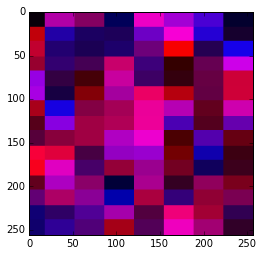

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(frame)


In [1]:
from PyQt4 import QtCore, QtGui
import numpy
import scipy.ndimage
if __name__ == "__main__":
    import numpy
    app = QtGui.QApplication([])
    wg = QtGui.QWidget()
    wg.resize(800,600)
    #prepare slices
    ch_par=281
    QVsize_x,QVsize_y=ch_par,256
    finalTrims=numpy.array([[0,ch_par,0,256,0,ch_par,0,256],[0,ch_par,0,256,0,ch_par,256,512]])
    im_data=numpy.random.rand(16*16).reshape([16,16])
    im_data=scipy.ndimage.zoom(im_data, 16*2, order=0)
    
    frames = []
    for coords in finalTrims:
        base = numpy.zeros([QVsize_x,QVsize_y])
        base[coords[0]:coords[1],coords[2]:coords[3]]=im_data[coords[4]:coords[5],coords[6]:coords[7]]
        frames.append(base)
    frames=numpy.array(frames)
    #

    frame_,cols,pixmap_min,pixmap_max = frames,numpy.array([[1,0,0],[0,0,1]]),0.,1.
    frame = numpy.dot(numpy.transpose(frame_),cols)
    # Rescale & convert to 8bit
    frame = numpy.ascontiguousarray(frame, dtype = numpy.float32)
    frame = 255.0 * (frame - float(pixmap_min))/float(pixmap_max - pixmap_min)
    frame[(frame > 255.0)] = 255.0
    frame[(frame < 0.0)] = 0.0
    frame = frame.astype(numpy.uint8)

    # Create the pixmap
    w, h = frame.shape[:2]
    #image_ = QtGui.QImage(frame.data, 256, 257, QtGui.QImage.Format_RGB888)
    #image_ = QtGui.QImage(frame.data, 257, 256, QtGui.QImage.Format_RGB888)
    #image_ = QtGui.QImage(frame.data, 256, 256, QtGui.QImage.Format_RGB888)
    #image_ = QtGui.QImage(frame.data, 257, 257, QtGui.QImage.Format_RGB888)
    image_ = QtGui.QImage(frame.data, h, w,h*3, QtGui.QImage.Format_RGB888)
    image_.ndarray = frame
    pixmap = QtGui.QPixmap.fromImage(image_)
    label = QtGui.QLabel(wg)
    label.setPixmap(pixmap)
    wg.show()
    app.exec_()

In [4]:
im_data=numpy.random.rand(16*16).reshape([16,16])
im_data=scipy.ndimage.zoom(im_data, 16*2, order=0)

In [2]:
frame.shape

(256L, 257L, 3L)

(256L, 257L, 3L)

In [1]:
1+7

8

8

8

8

In [2]:
col

In [9]:
col.toRgb().

4294901760L

In [14]:
col.getRgbF()

(1.0, 0.0, 0.0, 1.0)

In [15]:
col.name()

PyQt4.QtCore.QString(u'#ff0000')

In [25]:
window.cols[1]

array([0, 0, 1])

caini
caini
caini
caini


In [27]:
colT.getRgbF()[:3]

(0.0, 0.0, 0.0)

In [3]:
pisici=[1,2,3]
if pisici not List:
    print "pisici"

SyntaxError: invalid syntax (<ipython-input-3-34fdb23cc49c>, line 2)

In [5]:
save_dic

{'QVsize_x': 200,
 'QVsize_y': 100,
 'activeCols': array([[ 0.        ,  0.66666667,  0.49803922],
        [ 0.        ,  0.        ,  1.        ]]),
 'cols': array([[ 0.        ,  0.66666667,  0.49803922],
        [ 0.        ,  0.        ,  1.        ],
        [ 0.        ,  1.        ,  0.        ],
        [ 1.        ,  1.        ,  0.        ]]),
 'finalTrims': array([[  0, 200,   0, 100, 282, 482, 272, 372],
        [  0, 200,   0, 100,  38, 238, 355, 455]]),
 'nr_views': 2,
 'pixmap_maxs': [780, 340, 340, 340],
 'pixmap_mins': [0, 0, 0, 0]}

In [18]:
import pickle
import numpy
import matplotlib.pyplot as plt
import glob


folder = 'C:\\Users\\Bogdan\\Desktop\\MOE_Olfr1507_Stellaris_7_10_2015\\mosaic\\'

filenames = glob.glob(folder+'*.stv')

dics=[pickle.load(open(filename,'r')) for filename in filenames]

h,w = dics[0]["height"],dics[0]["width"]

pos_x = numpy.array([dic['x_pix'] for dic in dics],dtype=int)
pos_y = numpy.array([dic['y_pix'] for dic in dics],dtype=int)

pos_x=pos_x-numpy.min(pos_x)
pos_y=pos_y-numpy.min(pos_y)

im=numpy.zeros([max(pos_x+w+1),max(pos_y+h+1)])
for i in range(len(dics)):
    im0 = dics[i]["data"]
    im[pos_x[i]:pos_x[i]+w,pos_y[i]:pos_y[i]+h]=im0

image=numpy.dot(numpy.transpose(numpy.array([im])),numpy.array([[1,1,1]]))
image=image.astype(float)
image=image/numpy.max(image)
plt.imshow(image)

import scipy.io as sio

matlab_dic={"im":im}
sio.savemat(folder+"im.mat",matlab_dic)

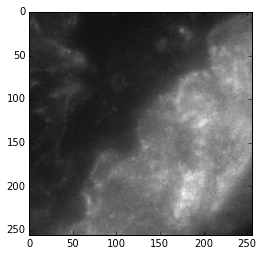

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
image=numpy.dot(numpy.transpose(numpy.array([dic["data"]])),numpy.array([[1,1,1]]))
image=image.astype(float)
image=image/numpy.max(image)
plt.imshow(image)

In [30]:
h,w = dics[0]["height"],dics[0]["width"]

pos_x = numpy.array([dic['x_pix'] for dic in dics],dtype=int)
pos_y = numpy.array([dic['y_pix'] for dic in dics],dtype=int)

pos_x=pos_x-numpy.min(pos_x)
pos_y=pos_y-numpy.min(pos_y)

im=numpy.zeros([max(pos_x+w+1),max(pos_y+h+1)])
for i in range(len(dics)):
    im0 = dics[i]["data"]
    im[pos_x[i]:pos_x[i]+w,pos_y[i]:pos_y[i]+h]=im0

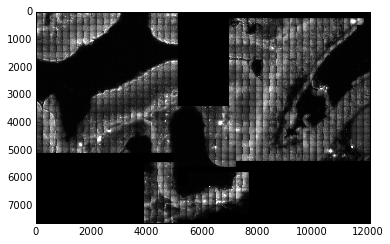

In [33]:
image=numpy.dot(numpy.transpose(numpy.array([im])),numpy.array([[1,1,1]]))
image=image.astype(float)
image=image/numpy.max(image)
plt.imshow(image)